# Example of custom training in TF1

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build training data

In [2]:
n = 100
TRUE_W = 3.0
TRUE_b = 2.0

# random samples from normal distribution
np.random.seed(1)
r = np.random.normal(loc=0, scale=0.5, size=n)

# build data
inputs = np.random.normal(loc=0, scale=0.5, size=n)
outputs = TRUE_W * inputs + TRUE_b + r

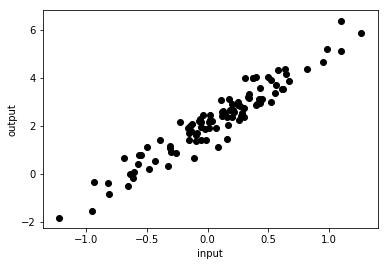

In [3]:
plt.scatter(inputs, outputs, c='black')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

# Define model

In [4]:
# graph input placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

# trainable variables
W = tf.Variable(5.0, name="weight")
b = tf.Variable(0.0, name="bias")

# linear model
pred = tf.add(tf.multiply(X, W), b)

# Train model

## Setup configurations

In [5]:
N_EPOCHS = 10
LEARNING_RATE = 0.01

# loss
loss = tf.reduce_mean(tf.square(pred - Y))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

# initialize variables
init = tf.global_variables_initializer()

## Execute training

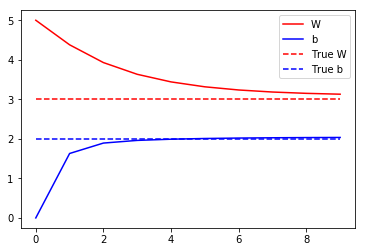

In [6]:
with tf.Session() as sess:

    sess.run(init)

    Ws, bs = [], []
    epochs = range(N_EPOCHS)
    for epoch in epochs:

        # get variables and loss before training of each epoch
        _W, _b = sess.run([W, b], feed_dict={X: inputs, Y: outputs})
        
        # record variables
        Ws.append(_W)
        bs.append(_b)
        
        # train
        for (x, y) in zip(inputs, outputs):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
    # plot the evolution of trainable variables
    plt.plot(epochs, Ws, 'r',
             epochs, bs, 'b')
    plt.plot([TRUE_W] * len(epochs), 'r--',
             [TRUE_b] * len(epochs), 'b--')
    plt.legend(['W', 'b', 'True W', 'True b'])
    plt.show()